In [19]:
import struct
import numpy as np
from PIL  import Image
import matplotlib.pyplot as plt


In [12]:
sz_record = 8199

def read_record_ETL8G(f):
    s = f.read(sz_record)
    r = struct.unpack('>2H8sI4B4H2B30x8128s11x', s)
    iF = Image.frombytes('F', (128, 127), r[14], 'bit', 4)
    iL = iF.convert('L')
    return r + (iF,iL,)
  
def read_hiragana():
    # Type of characters = 70, person = 160, y = 127, x = 128
    ary = np.zeros([71, 160, 127, 128], dtype=np.uint8)

    for j in range(1, 33):
        filename = '../../ETL8G/ETL8G_{:02d}'.format(j)
        with open(filename, 'rb') as f:
            for id_dataset in range(5):
                moji = 0
                for i in range(956):
                    r = read_record_ETL8G(f)
                    if b'.HIRA' in r[2] or b'.WO.' in r[2]:
                        if not b'KAI' in r[2] and not b'HEI' in r[2]:
                            ary[moji, (j - 1) * 5 + id_dataset] = np.array(r[-1])
                            moji += 1
    np.savez_compressed("hiragana.npz", ary)

In [9]:
read_hiragana()

In [6]:
# Type of characters = 70, person = 160, y = 127, x = 128
ary = np.zeros([71, 160, 127, 128], dtype=np.uint8)
j = 1
filename = '../../ETL8G/ETL8G_{:02d}'.format(j) 
f = open(filename, 'rb')
    
    
    

In [22]:
r = read_record_ETL8G(f)

In [27]:
print(r[0:-2], hex(r[1]))
iE = Image.eval(r[-1], lambda x: 0+x*16)

(1, 12397, b'ICHI.HIT', 4, 0, 0, 1, 24, 3552, 0, 8001, 16880, 3, 0, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [33]:
pic = np.array(iE)

In [35]:
pic.shape

(127, 128)

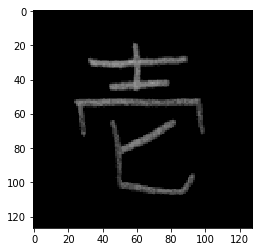

In [38]:
plt.imshow(Image.fromarray(pic))

In [40]:
# sz_record = 8199

def read_record_ETL8G(f):
    s = f.read(sz_record)
    r = struct.unpack('>2H8sI4B4H2B30x8128s11x', s)
    iF = Image.frombytes('F', (128, 127), r[14], 'bit', 4)
    iL = iF.convert('L')
    iL = iE = Image.eval(iL, lambda x: 0+x*16)
    return r + (iL,)
  
def read_hiragana():
    # Type of characters = 70, person = 160, y = 127, x = 128
    ary = np.zeros([71, 160, 127, 128], dtype=np.uint8)

    for j in range(1, 33):
        filename = '../../ETL8G/ETL8G_{:02d}'.format(j)
        with open(filename, 'rb') as f:
            for id_dataset in range(5):
                moji = 0
                for i in range(956):
                    r = read_record_ETL8G(f)
                    if b'.HIRA' in r[2] or b'.WO.' in r[2]:
                        if not b'KAI' in r[2] and not b'HEI' in r[2]:
                            ary[moji, (j - 1) * 5 + id_dataset] = np.array(r[-1])
                            moji += 1
    np.savez_compressed("hiragana.npz", ary)

In [41]:
read_hiragana()